In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
df = pd.read_csv('bodyPerformance.csv')
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [2]:
df.shape

(13393, 12)

In [3]:
df.describe()

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
count,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000,13393.000000
mean,36.775106,168.559807,67.447316,23.240165,78.796842,130.234817,36.963877,15.209268,39.771224,190.129627
std,13.625639,8.426583,11.949666,7.256844,10.742033,14.713954,10.624864,8.456677,14.276698,39.868000
min,21.000000,125.000000,26.300000,3.000000,0.000000,0.000000,0.000000,-25.000000,0.000000,0.000000
25%,25.000000,162.400000,58.200000,18.000000,71.000000,120.000000,27.500000,10.900000,30.000000,162.000000
50%,32.000000,169.200000,67.400000,22.800000,79.000000,130.000000,37.900000,16.200000,41.000000,193.000000
75%,48.000000,174.800000,75.300000,28.000000,86.000000,141.000000,45.200000,20.700000,50.000000,221.000000
max,64.000000,193.800000,138.100000,78.400000,156.200000,201.000000,70.500000,213.000000,80.000000,303.000000


In [4]:
df.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

In [5]:
d = {'M': 'Male',
     'F': 'Female'
    }
df['gender'] = df['gender'].map(d)
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,Male,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,Male,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,Male,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,Male,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,Male,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,Male,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,Male,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,Male,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,Female,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [6]:
ratio_of_participants_by_gender = (
    df['gender'].value_counts(normalize=True)*100
).round(1)
ratio_of_participants_by_gender.astype(str) + '%'

Male      63.2%
Female    36.8%
Name: gender, dtype: object

<AxesSubplot:title={'center':'The percentage of participants by gender'}, ylabel='gender'>

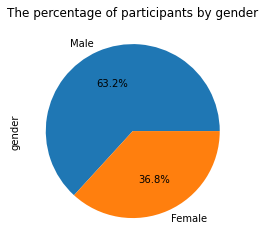

In [7]:
ax = ratio_of_participants_by_gender.plot.pie(
    autopct='%.1f%%', 
    title = 'The percentage of participants by gender'
)
ax

In [8]:
# Checking the max and the min values of age to divide all the participants into 5 ranges of age:
df['age'].max()

64.0

In [9]:
df['age'].min()

21.0

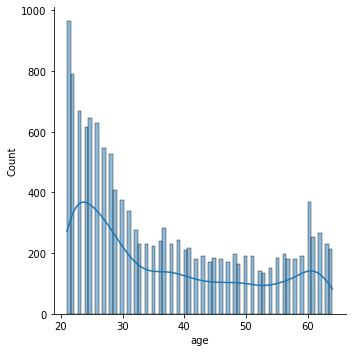

In [10]:
ax1 = sns.displot(
    df['age'], 
    kde=True, 
    bins = 75
)
ax1

In [11]:
# Creating the new column ('age_range') with 5 different age ranges and overwriting the original dataframe:
df['age_range'] = pd.cut(
                        df['age'], 
                        [20, 30, 40, 50, 60, 70], 
                        labels=['20-30', '31-40', '41-50', '51-60', '60<']
)
df

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class,age_range
0,27.0,Male,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C,20-30
1,25.0,Male,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A,20-30
2,31.0,Male,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C,31-40
3,32.0,Male,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B,31-40
4,28.0,Male,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B,20-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,Male,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C,20-30
13389,21.0,Male,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D,20-30
13390,39.0,Male,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A,31-40
13391,64.0,Female,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D,60<


In [12]:
df.columns
df = df[
        ['age', 'age_range', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm', 'class']
]
df

,age,age_range,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,20-30,Male,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,20-30,Male,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,31-40,Male,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,31-40,Male,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,20-30,Male,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,20-30,Male,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,20-30,Male,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,31-40,Male,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,60<,Female,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


In [13]:
ratio_of_participants_by_age = (
    df['age_range'].value_counts(normalize=True)*100
).round(1)
ratio_of_participants_by_age.astype(str) + '%'

20-30    46.0%
31-40    18.7%
51-60    14.3%
41-50    13.8%
60<       7.2%
Name: age_range, dtype: object

Text(0, 0.5, 'Age groups ( by years)')

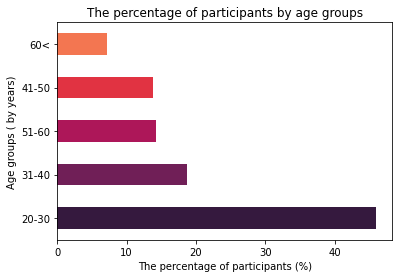

In [14]:
ax2 = ratio_of_participants_by_age.plot.barh(
    color = sns.color_palette("rocket"), 
    title = 'The percentage of participants by age groups'
)
ax2.set_xlabel("The percentage of participants (%)")
ax2.set_ylabel("Age groups ( by years)")

In [15]:
Average_health_parameters_by_age_range_and_gender = df.groupby(
    ['age_range', 'gender']
)[['body fat_%', 'diastolic', 'systolic']].mean()
bx = Average_health_parameters_by_age_range_and_gender.reset_index()
bx

,age_range,gender,body fat_%,diastolic,systolic
0,20-30,Female,27.193598,73.970253,120.390145
1,20-30,Male,18.724054,78.398002,131.627119
2,31-40,Female,27.352906,75.483287,121.369081
3,31-40,Male,20.635829,81.543290,133.739978
4,41-50,Female,28.352941,77.035361,124.848656
5,41-50,Male,21.679692,84.030783,135.267370
6,51-60,Female,31.242979,77.658314,130.080866
7,51-60,Male,21.900599,83.323106,137.417066
8,60<,Female,31.761471,77.447689,133.411192
9,60<,Male,22.915630,82.175407,140.759494


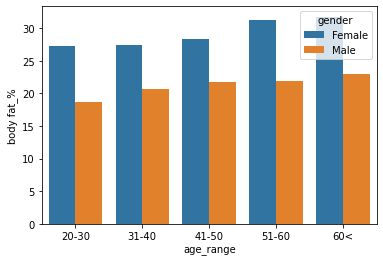

In [16]:
ax3 = sns.barplot(
    data = bx,
    x = 'age_range', 
    y = 'body fat_%', 
    hue = 'gender',
            )

In [17]:
cx= bx.copy()
cx

,age_range,gender,body fat_%,diastolic,systolic
0,20-30,Female,27.193598,73.970253,120.390145
1,20-30,Male,18.724054,78.398002,131.627119
2,31-40,Female,27.352906,75.483287,121.369081
3,31-40,Male,20.635829,81.543290,133.739978
4,41-50,Female,28.352941,77.035361,124.848656
5,41-50,Male,21.679692,84.030783,135.267370
6,51-60,Female,31.242979,77.658314,130.080866
7,51-60,Male,21.900599,83.323106,137.417066
8,60<,Female,31.761471,77.447689,133.411192
9,60<,Male,22.915630,82.175407,140.759494


In [18]:
cx["gender_age_range"] = cx[
    ["gender", "age_range"]
].astype(str).apply(" ".join, axis=1)
cx

,age_range,gender,body fat_%,diastolic,systolic,gender_age_range
0,20-30,Female,27.193598,73.970253,120.390145,Female 20-30
1,20-30,Male,18.724054,78.398002,131.627119,Male 20-30
2,31-40,Female,27.352906,75.483287,121.369081,Female 31-40
3,31-40,Male,20.635829,81.543290,133.739978,Male 31-40
4,41-50,Female,28.352941,77.035361,124.848656,Female 41-50
5,41-50,Male,21.679692,84.030783,135.267370,Male 41-50
6,51-60,Female,31.242979,77.658314,130.080866,Female 51-60
7,51-60,Male,21.900599,83.323106,137.417066,Male 51-60
8,60<,Female,31.761471,77.447689,133.411192,Female 60<
9,60<,Male,22.915630,82.175407,140.759494,Male 60<


In [19]:
cx['systolic-diastolic'] = cx['systolic'] - cx['diastolic']
cx
cx[['diastolic', 'systolic-diastolic', 'systolic']] = cx[['diastolic', 'systolic-diastolic', 'systolic']].round(1)
cx


,age_range,gender,body fat_%,diastolic,systolic,gender_age_range,systolic-diastolic
0,20-30,Female,27.193598,74.0,120.4,Female 20-30,46.4
1,20-30,Male,18.724054,78.4,131.6,Male 20-30,53.2
2,31-40,Female,27.352906,75.5,121.4,Female 31-40,45.9
3,31-40,Male,20.635829,81.5,133.7,Male 31-40,52.2
4,41-50,Female,28.352941,77.0,124.8,Female 41-50,47.8
5,41-50,Male,21.679692,84.0,135.3,Male 41-50,51.2
6,51-60,Female,31.242979,77.7,130.1,Female 51-60,52.4
7,51-60,Male,21.900599,83.3,137.4,Male 51-60,54.1
8,60<,Female,31.761471,77.4,133.4,Female 60<,56.0
9,60<,Male,22.915630,82.2,140.8,Male 60<,58.6


<AxesSubplot:title={'center':'Blood pressure by age groups and genders'}, xlabel='gender_age_range'>

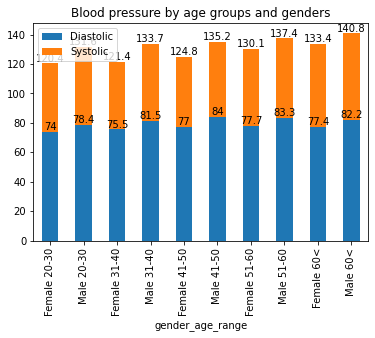

In [20]:
cx.rename(columns = {
    'diastolic':'Diastolic', 
    'systolic-diastolic':'Systolic'}, 
          inplace = True
)
ax4 = cx.plot.bar(
    x='gender_age_range', 
    y=['Diastolic', 'Systolic'], 
    stacked=True, 
    title='Blood pressure by age groups and genders'
)
for container in ax4.containers:
    ax4.bar_label(container)
    
ax4

In [21]:
df_filtered = df.loc[:, ['age_range', 'age', 'gender', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts', 'broad jump_cm']]
df_filtered

,age_range,age,gender,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,20-30,27.0,Male,54.9,18.4,60.0,217.0
1,20-30,25.0,Male,36.4,16.3,53.0,229.0
2,31-40,31.0,Male,44.8,12.0,49.0,181.0
3,31-40,32.0,Male,41.4,15.2,53.0,219.0
4,20-30,28.0,Male,43.5,27.1,45.0,217.0
...,...,...,...,...,...,...,...
13388,20-30,25.0,Male,35.8,17.4,47.0,198.0
13389,20-30,21.0,Male,33.0,1.1,48.0,167.0
13390,31-40,39.0,Male,63.5,16.4,45.0,229.0
13391,60<,64.0,Female,19.3,9.2,0.0,75.0


In [22]:
df_filtered_median = df_filtered.groupby("gender").median()
df_filtered_median

,age,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
gender,,,,,
Female,34.0,25.6,20.0,32.0,156.0
Male,32.0,43.3,14.2,46.0,214.0


<AxesSubplot:xlabel='age_range', ylabel='gripForce'>

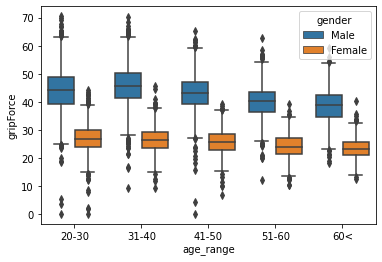

In [23]:
ax5 = sns.boxplot(
    data = df_filtered, 
    x = "age_range", 
    y = "gripForce", 
    hue = "gender"
)
ax5

<AxesSubplot:xlabel='age_range', ylabel='sit and bend forward_cm'>

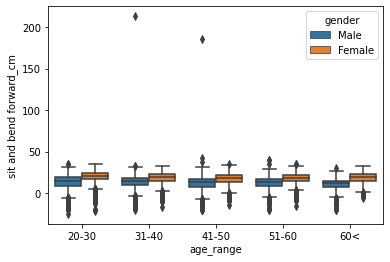

In [24]:
ax6 = sns.boxplot(
    data = df_filtered, 
    x = "age_range", 
    y = "sit and bend forward_cm", 
    hue = "gender"
)
ax6

<AxesSubplot:xlabel='age_range', ylabel='sit and bend forward_cm'>

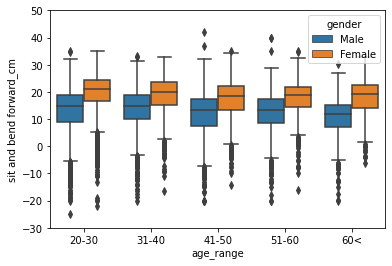

In [25]:
ax6 = sns.boxplot(
    data = df_filtered, 
    x = "age_range", 
    y = "sit and bend forward_cm", 
    hue = "gender"
)
ax6.set(
    ylim=(-30, 50)
)
ax6

In [26]:
top_performers = df[
        (df['gripForce']>= (df['gripForce'].mean()))
    &   (df['sit-ups counts'] >= (df['sit-ups counts'].mean()))
    &   (df['broad jump_cm'] >= (df['broad jump_cm'].mean()))
    &   (df['sit and bend forward_cm'] >= (df['sit and bend forward_cm'].mean()))
]
top_performers

,age,age_range,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,20-30,Male,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
4,28.0,20-30,Male,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
10,42.0,41-50,Male,169.2,65.40,19.3,63.0,110.0,43.5,16.0,68.0,211.0,A
13,22.0,20-30,Male,175.7,67.90,11.3,71.0,103.0,52.5,19.2,55.0,232.0,C
17,26.0,20-30,Male,179.9,71.50,9.7,64.0,135.0,59.6,17.8,61.0,239.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13363,37.0,31-40,Male,181.1,81.10,14.4,68.0,124.0,52.9,19.1,54.0,234.0,A
13365,22.0,20-30,Male,170.5,77.20,23.2,84.0,134.0,47.7,21.0,55.0,233.0,D
13370,44.0,41-50,Male,171.3,77.90,22.8,94.0,148.0,42.0,17.9,45.0,205.0,C
13371,54.0,51-60,Male,164.7,67.50,15.2,83.0,139.0,43.8,16.0,45.0,231.0,A


In [27]:
top_performers_by_gender = top_performers['gender'].value_counts()
top_performers_by_gender

Male      2714
Female      14
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

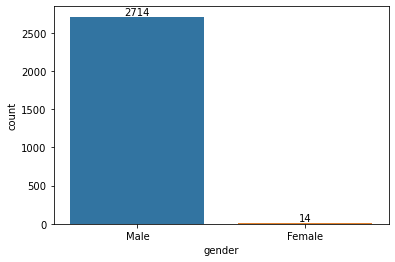

In [28]:
ax7 = sns.countplot(
    data=top_performers, 
    x='gender'
)

for container in ax7.containers:
    ax7.bar_label(container)
    
ax7

In [29]:
Top_female_performers = top_performers[
    top_performers['gender'] == 'Female'
]
Top_female_performers.sort_values("body fat_%")

,age,age_range,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
11712,32.0,31-40,Female,163.0,51.60,15.6,87.0,120.0,39.7,26.2,40.0,191.0,B
7803,23.0,20-30,Female,165.8,56.70,15.7,77.0,115.0,39.8,27.4,52.0,200.0,B
1944,21.0,20-30,Female,165.7,51.94,19.1,80.0,120.0,37.5,19.7,42.0,196.0,A
7340,21.0,20-30,Female,170.3,63.20,21.5,71.0,111.0,38.1,31.8,43.0,230.0,A
5173,34.0,31-40,Female,162.0,52.30,21.6,85.0,120.0,38.0,29.4,62.0,203.0,A
6597,28.0,20-30,Female,161.5,65.50,22.0,76.0,135.0,37.7,28.9,49.0,213.0,A
6420,32.0,31-40,Female,174.2,73.30,23.3,70.0,122.0,39.3,23.3,52.0,191.0,A
6230,37.0,31-40,Female,178.2,74.90,23.8,77.0,128.0,44.7,22.3,46.0,191.0,D
9870,26.0,20-30,Female,162.2,64.50,24.4,65.0,100.0,38.0,20.8,64.0,197.0,A
11089,29.0,20-30,Female,164.1,70.50,26.1,92.0,125.0,41.3,19.8,56.0,211.0,A


In [33]:
top_female_performers_mean_body_fat = round(Top_female_performers['body fat_%'].mean(),1)
top_female_performers_mean_body_fat
# That's how to round float type value.

23.5

In [34]:
All_female_performers_mean_body_fat = round(df[
    df['gender'] == 'Female'
]['body fat_%'].mean(),1)
All_female_performers_mean_body_fat

28.5